# Build model

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, MaxPool2D, Flatten, GlobalMaxPooling2D, Concatenate, Dense, Conv2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
# from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import norm
import os
import cv2
import csv

In [2]:
tf.random.set_seed( 1)
input = Input(shape=(150,150,3))
ResNet50_pretrained_model = ResNet50(weights= 'imagenet', include_top=False, input_tensor=input )
for layer in ResNet50_pretrained_model.layers:
    layer.trainable = False
ResNet50_model_output = ResNet50_pretrained_model.output
feature = GlobalMaxPooling2D()(ResNet50_model_output)
conv1 = Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(input)
max_pool1 = MaxPool2D(pool_size=(3,3),padding='same')(conv1)
conv2 = Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(max_pool1)
max_pool2 = MaxPool2D(pool_size=(3,3),padding='same')(conv2)
conv3 = Conv2D(filters=1024,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(max_pool2)
conv_pool = GlobalMaxPooling2D()(conv3)
# flatten = Flatten()(conv)
# hidden = Dense(1024, activation='relu')(flatten)
concatenated = Concatenate()([feature, conv_pool])
ResNet50_model = Model(inputs=input, outputs= concatenated)
ResNet50_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [3]:
from tensorflow.keras.models import load_model
# ResNet50_model.save(os.path.join('models','extract_feature_Resnet50_Tuning.h5'))
# Resnet50_model = load_model('./models/extract_feature_Resnet50_Tuning.h5')

# Extract feature and save into pickle file

In [68]:
def extract_feature(img_path, model):
    img = cv2.imread(img_path)
    img = np.array(img)
    #(number of img,150,150,3)
    expand_img = np.expand_dims(img,axis=0)
    pre_pro_img = preprocess_input(expand_img) 
    feature = model.predict(pre_pro_img).flatten()
    normalized = feature/norm(feature)
    return normalized

In [5]:

def get_image_feature(path, model): # get features of all image in a folder
    file_name =[]
    feature = []
    for root, directory, file in os.walk(path):
        for f in file:
            if os.path.isfile(os.path.join(root,f)):
                file_name.append(f[:-4])
                feature.append(extract_feature(os.path.join(root,f), model))
    return file_name, feature



In [6]:
import pickle
def get_pkl_file(path,event, part, model): # save features extracted from above model
    file  = []
    feature = []
    file,feature = get_image_feature(path +'/'+ event +'/'+ part, model)
    pickle.dump(file,open('./ClothesData/Pickle_File/'+ event+'_'+part+'_filename.pkl', 'wb'))
    pickle.dump(feature,open('./ClothesData/Pickle_File/'+event+'_'+part+'_feature.pkl', 'wb'))
    return  file,feature 

In [7]:
# save top feature 
concert_top_file  = []
concert_top_feature = []
concert_top_file,concert_top_feature = get_pkl_file('./ClothesData/Women/','Concert', 'UpperPart', ResNet50_model)

graduation_top_file  = []
graduation_top_feature = []
graduation_top_file,concert_top_feature = get_pkl_file('./ClothesData/Women/','Graduation', 'UpperPart', ResNet50_model)

meeting_top_file  = []
meeting_top_feature = []
meeting_top_file,meeting_top_feature = get_pkl_file('./ClothesData/Women/','Meeting', 'UpperPart', ResNet50_model)

wedding_top_file  = []
wedding_top_feature = []
wedding_top_file,wedding_top_feature = get_pkl_file('./ClothesData/Women/','WhiteWedding', 'UpperPart', ResNet50_model)

# save bottom feature
concert_bottom_file  = []
concert_bottom_feature = []
concert_bottom_file,concert_bottom_feature = get_pkl_file('./ClothesData/Women/','Concert', 'LowerPart', ResNet50_model)

graduation_bottom_file  = []
graduation_bottom_feature = []
graduation_bottom_file,concert_bottom_feature = get_pkl_file('./ClothesData/Women/','Graduation', 'LowerPart', ResNet50_model)

meeting_bottom_file  = []
meeting_bottom_feature = []
meeting_bottom_file,meeting_bottom_feature = get_pkl_file('./ClothesData/Women/','Meeting', 'LowerPart', ResNet50_model)

wedding_bottom_file  = []
wedding_bottom_feature = []
wedding_bottom_file,wedding_bottom_feature = get_pkl_file('./ClothesData/Women/','WhiteWedding', 'LowerPart', ResNet50_model)

# fullpart feature
concert_fullpart_file = []
concert_fullpart_feature = []
concert_fullpart_file,concert_fullpart_feature = get_pkl_file('./ClothesData/Women/','Concert', 'FullPart', ResNet50_model)

graduation_fullpart_file = []
graduation_fullpart_feature = []
graduation_fullpart_file,graduation_fullpart_feature = get_pkl_file('./ClothesData/Women/','Graduation', 'FullPart', ResNet50_model)

meeting_fullpart_file = []
meeting_fullpart_feature = []
meeting_fullpart_file,meeting_fullpart_feature = get_pkl_file('./ClothesData/Women/','Meeting', 'FullPart', ResNet50_model)

wedding_fullpart_file = []
wedding_fullpart_feature = []
wedding_fullpart_file,wedding_fullpart_feature = get_pkl_file('./ClothesData/Women/','WhiteWedding', 'FullPart', ResNet50_model)


(150, 150, 3)


1/1 [==============================] - 2s 2s/step
(150, 150, 3)
1/1 [==============================] - 0s 106ms/step
(150, 150, 3)
1/1 [==============================] - 0s 119ms/step
(150, 150, 3)
1/1 [==============================] - 0s 120ms/step
(150, 150, 3)
1/1 [==============================] - 0s 119ms/step
(150, 150, 3)
1/1 [==============================] - 0s 134ms/step
(150, 150, 3)
1/1 [==============================] - 0s 122ms/step
(150, 150, 3)
1/1 [==============================] - 0s 114ms/step
(150, 150, 3)
1/1 [==============================] - 0s 117ms/step
(150, 150, 3)
1/1 [==============================] - 0s 106ms/step
(150, 150, 3)
1/1 [==============================] - 0s 117ms/step
(150, 150, 3)
1/1 [==============================] - 0s 116ms/step
(150, 150, 3)
1/1 [==============================] - 0s 133ms/step
(150, 150, 3)
1/1 [==============================] - 0s 117ms/step
(150, 150, 3)
1/1 [==============================] - 0s 116ms/step
(150, 150, 3

In [8]:
for layer in ResNet50_model.layers:
    layer.trainable = False

# KNN recommendation

In [9]:
# from sklearn.neighbors import NearestNeighbors
# concert_t_feature =np.array(pickle.load(open('./ClothesData/Pickle_File/Concert_UpperPart_feature.pkl', 'rb')) )
# concert_t_filename =np.array(pickle.load(open('./ClothesData/Pickle_File/Concert_UpperPart_filename.pkl', 'rb')) )

# neighbor = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
# neighbor.fit(concert_t_feature)

# distance, rcm = neighbor.kneighbors(img.reshape(1,-1))

In [10]:
event = {'0': 'Concert', '1': 'Graduation', '2': 'Meeting', '3': 'WhiteWedding' }
part = {'0': 'UpperPart', '1': 'LowerPart', '2': 'FullPart'}

In [11]:
from sklearn.neighbors import NearestNeighbors
def find_similar(imagepath,event_state, num_part, n_neighbor): 
    feature =np.array(pickle.load(open('./ClothesData/Pickle_File/'+ event[str(event_state)] +'_'+ part[str(num_part)] +'_feature.pkl', 'rb')) )
    filename =np.array(pickle.load(open('./ClothesData/Pickle_File/'+ event[str(event_state)] +'_'+ part[str(num_part)] +'_filename.pkl', 'rb')))
    # neighbor = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='euclidean')
    neighbor = NearestNeighbors(n_neighbors = n_neighbor, algorithm='brute', metric='euclidean')
    neighbor.fit(feature,filename)

    image_extracted = extract_feature(imagepath, ResNet50_model)
    distance, rcm = neighbor.kneighbors(image_extracted.reshape(1,-1))
    return filename[rcm[0][:n_neighbor]] # return file name of recommended items

In [12]:
# pickle.dump(concert_top_file + concert_bottom_file,open('./ClothesData/Pickle_File/'+ 'concert_filename.pkl', 'wb'))
# pickle.dump(concert_top_feature + concert_bottom_feature,open('./ClothesData/Pickle_File/'+'concert_feature.pkl', 'wb'))
# feature =np.array(pickle.load(open('./ClothesData/Pickle_File/'+ 'concert_feature.pkl', 'rb')) )
# filename =np.array(pickle.load(open('./ClothesData/Pickle_File/'+ 'concert_filename.pkl', 'rb')) )

# neighbor = NearestNeighbors(n_neighbors = 5, algorithm='brute', metric='euclidean')
# neighbor.fit(feature)

# image_extracted = extract_feature('D:/TLCN/OutfitRecommendation/fashion_recommendation_tkde2018_code_dataset/FashionVC/img/73515371.jpg', ResNet50_model)
# distance, rcm = neighbor.kneighbors(image_extracted.reshape(1,-1))

# image = cv2.imread('D:/TLCN/OutfitRecommendation/fashion_recommendation_tkde2018_code_dataset/FashionVC/img/73515371.jpg')
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title('Origin Image')

# show_image(filename[rcm[0][:5]],1,1)

In [13]:
def show_image(filename):
    img = []
    for f_name in filename:
        # img.append(cv2.imread('./ClothesData/Women/'+ event[str(event_state)]+'/' + part[str(num_part)] + '/'+ str(f_name) + '.jpg' ))
        img.append(cv2.imread('./ClothesData/all_img/' + str(f_name) + '.jpg' ))
    fig, ax = plt.subplots(ncols=len(img), figsize=(25,25))
    for i in range(len(img)):
        ax[i].imshow(cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB))
        ax[i].title.set_text('neibor'+ str(i))

In [26]:
def recommend_top(top_name, event_state, num_part):
    similar_filename = []
    similar_filename = find_similar('./ClothesData/all_img/'+ str(top_name)+'.jpg',event_state,num_part,4)

    image = cv2.imread('./ClothesData/all_img/'+ str(top_name)+'.jpg')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Origin Image')


    # list_img = []
    # for f_name in similar_filename:
    #     list_img.append(cv2.imread('./ClothesData/Women/Concert/UpperPart/'+ str(f_name) + '.jpg' ))

    show_image(similar_filename[1:])
    return similar_filename

# fig, ax = plt.subplots(ncols=len(list_img), figsize=(25,25))
# for i in range(len(list_img)):
#     ax[i].imshow(cv2.cvtColor(list_img[i], cv2.COLOR_BGR2RGB))
#     ax[i].title.set_text('neibor'+ str(i))


1/1 [==============================] - 0s 139ms/step


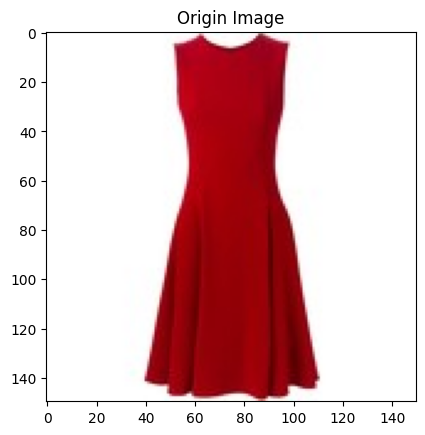

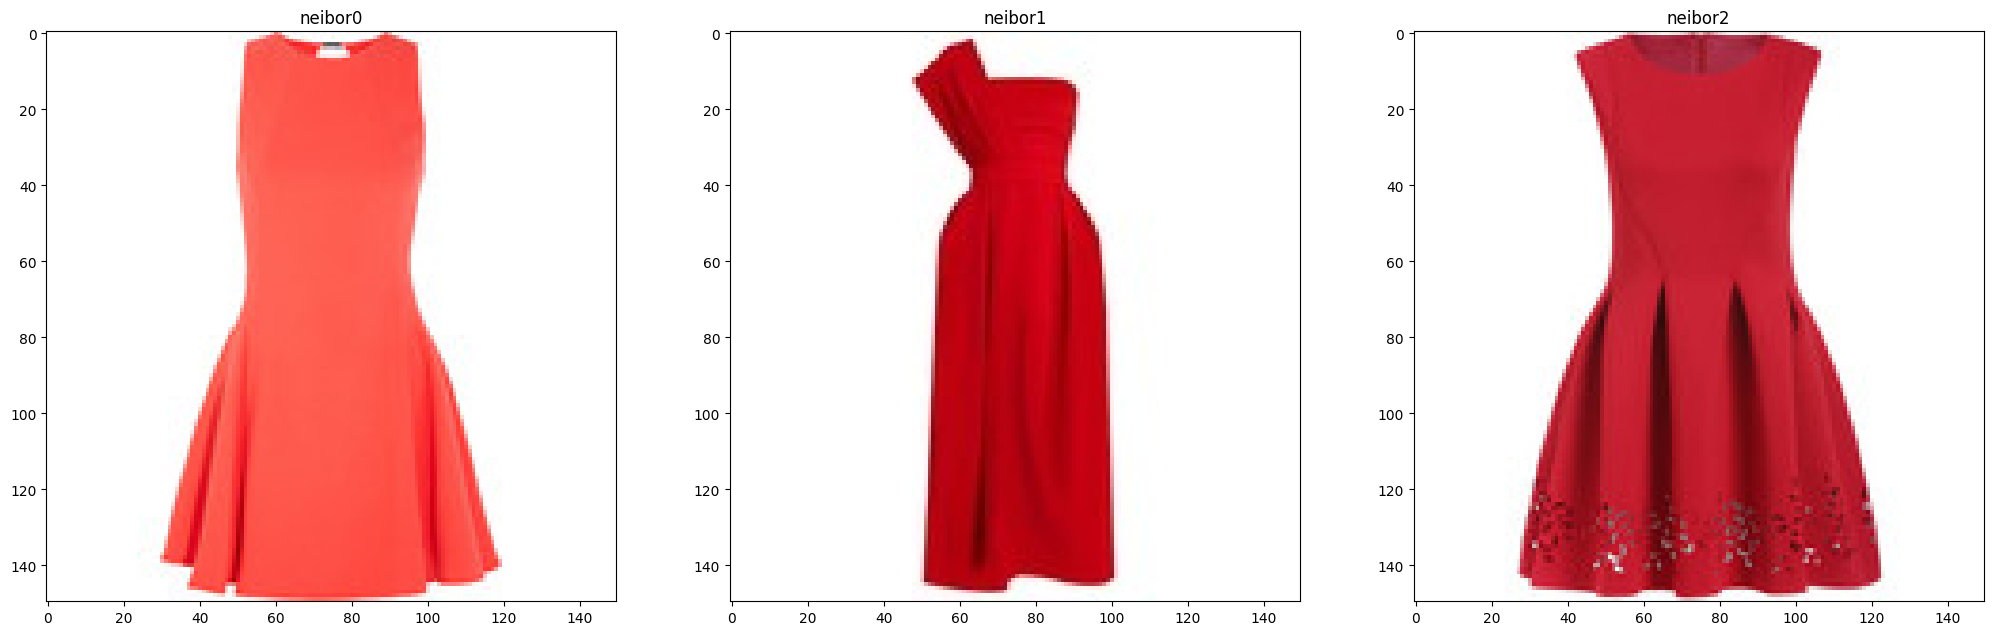

In [103]:
similar_top = recommend_top(144912036,3, 2)

In [104]:
similar_top

array(['144912036', '178834687', '194649213', '162972179'], dtype='<U9')

In [17]:
def find_lower(event_state, filename): # find low being corresponding with similar top found above 
    bottom = set()
    with open('./ClothesData/Women/'+ event[str(event_state)] + '/'+ event[str(event_state)].lower() + '_outfit.txt','r') as f:
        content = f.readlines()
        for line in content:
            line = line[:-1].split('\t')
            if line[0] == str(filename[0]):
                bottom.add(line[1])
    return bottom # return set of bottom namefile 

In [18]:
# bottom = set()
# with open('D:/TLCN/ClothesData/Women/Concert/concert_outfit.txt','r') as f:
#     content = f.readlines()
#     for line in content:
#         line = line[:-1].split('\t')
#         if line[0] == str(concert_t_filename[rcm[0][0]]) or line[0] == str(concert_t_filename[rcm[0][1]]) :
#             bottom.add('./ClothesData/Women/Concert/LowerPart/'+ line[1] + '.jpg')
# len(bottom)

In [19]:
# Wardrobe_Lower_file,Wardrobe_Lower_feature = get_image_feature('./ClothesData/Lower_wardrobe/', ResNet50_model)
# pickle.dump(Wardrobe_Lower_file,open('./ClothesData/Pickle_File/Wardrobe_Lower_filename.pkl', 'wb'))
# pickle.dump(Wardrobe_Lower_feature,open('./ClothesData/Pickle_File/Wardrobe_Lower_feature.pkl', 'wb'))

In [20]:
# def find_bottom_in_wardrobe(imagepath):
#     feature =np.array(pickle.load(open('./ClothesData/Pickle_File/Wardrobe_Lower_feature.pkl', 'rb')) )
#     filename =np.array(pickle.load(open('./ClothesData/Pickle_File/Wardrobe_Lower_filename.pkl', 'rb')))
#     neighbor = NearestNeighbors(n_neighbors = 1, algorithm='brute', metric='euclidean')
#     neighbor.fit(feature,filename)

#     image_extracted = extract_feature(imagepath, ResNet50_model)
#     distance, rcm = neighbor.kneighbors(image_extracted.reshape(1,-1))
#     return filename[rcm[0][:1]] # return file name of recommended items

In [21]:
import random
def recommend_bottom(event_state,similar_top, num_part ):
    bottom = find_lower(event_state,similar_top)
    bottom_similar = []
    bottom_name = set()
    for b in bottom:
        bottom_similar.append(find_similar('./ClothesData/Women/'+ event[str(event_state)]+'/' + part[str(num_part)] + '/'+ str(b) + '.jpg',event_state,num_part,2))
        for i in range(len(bottom_similar)):
            bottom_name.add(bottom_similar[i][0])
    if len(bottom_name)>5:
        bottom_show = random.sample(bottom_name, k=5)
    else:
        bottom_show = bottom_name
    # print(bottom_name)
    show_image(bottom_show)
    return bottom_show

(150, 150, 3)
1/1 [==============================] - 0s 136ms/step
(150, 150, 3)
1/1 [==============================] - 0s 124ms/step
(150, 150, 3)
1/1 [==============================] - 0s 139ms/step
(150, 150, 3)
1/1 [==============================] - 0s 134ms/step
(150, 150, 3)
1/1 [==============================] - 0s 136ms/step
(150, 150, 3)
1/1 [==============================] - 0s 133ms/step
(150, 150, 3)
1/1 [==============================] - 0s 134ms/step
(150, 150, 3)
1/1 [==============================] - 0s 118ms/step
(150, 150, 3)
1/1 [==============================] - 0s 117ms/step
(150, 150, 3)
1/1 [==============================] - 0s 119ms/step
(150, 150, 3)
1/1 [==============================] - 0s 112ms/step
(150, 150, 3)
1/1 [==============================] - 0s 119ms/step
(150, 150, 3)
1/1 [==============================] - 0s 118ms/step


C:\Users\hoang\AppData\Local\Temp\ipykernel_14888\3876035363.py:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  bottom_show = random.sample(bottom_name, k=5)


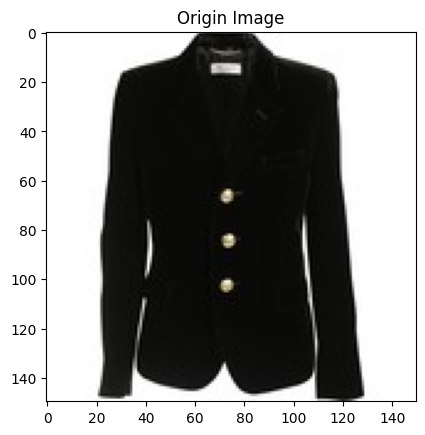

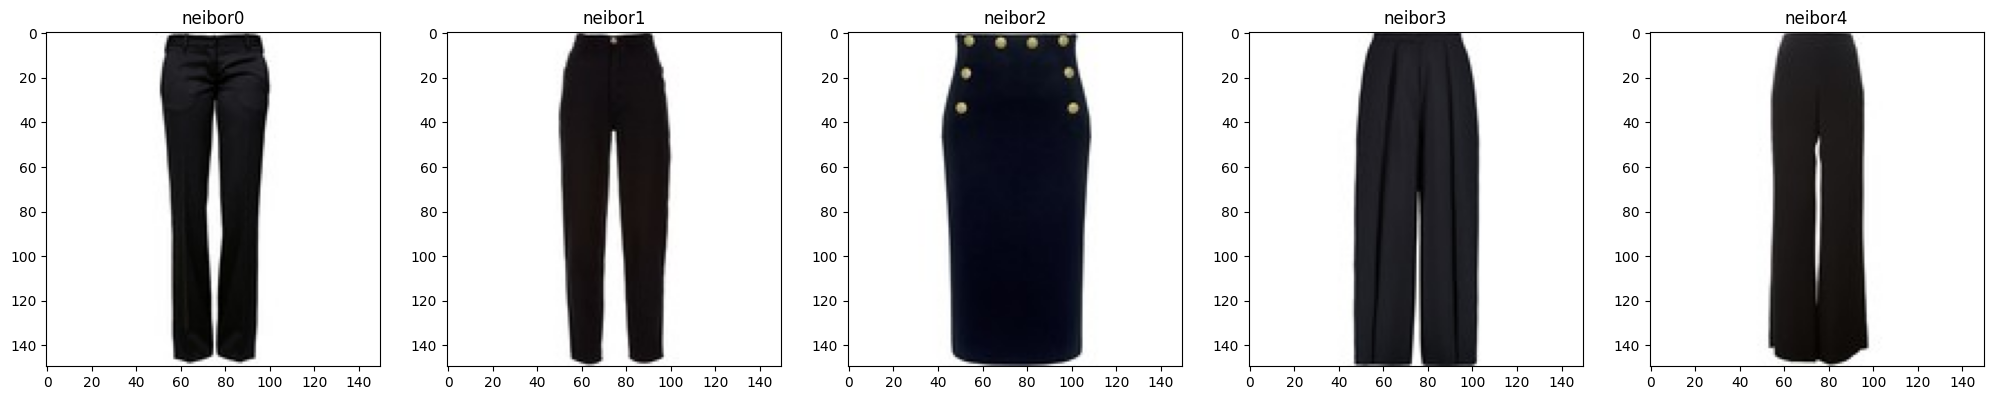

In [28]:
# bottom = find_lower(0,similar_top)
# bottom_similar = []
# bottom_name = set()
# count = 0
# for b in bottom:
#     count +=1
#     bottom_similar.append(find_similar('./ClothesData/Women/'+ event[str(0)]+'/' + part[str(1)] + '/'+ str(b) + '.jpg',0,1,1))
#     for i in range(len(bottom_similar)):
#         bottom_name.add(bottom_similar[i][0])

# image = cv2.imread('D:/TLCN/OutfitRecommendation/fashion_recommendation_tkde2018_code_dataset/FashionVC/img/112265128.jpg')
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title('Origin Image')
# show_image(bottom)
image = cv2.imread('./ClothesData/all_img/'+ similar_top[1]+ '.jpg')
# image = cv2.imread('./ClothesData/all_img/194551133.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Origin Image')
bottom = recommend_bottom(2,similar_top, 1)

In [23]:
# top_filename = find_similiar('D:/TLCN/OutfitRecommendation/fashion_recommendation_tkde2018_code_dataset/FashionVC/img/112265128.jpg',0, 0, 5)
# bottom = find_lower(0,top_filename)
# print(len(bottom))

# image = cv2.imread('D:/TLCN/OutfitRecommendation/fashion_recommendation_tkde2018_code_dataset/FashionVC/img/112265128.jpg')
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title('Origin Image')

# show_image(bottom,0,1)

# Similar model evaluate

In [41]:
def get_attr_for_eval(csv_path):
    with open(csv_path) as f:
        reader = csv.reader(f)
        attribute = [row[:7] for row in reader] # only take 6 first columns
    attribute = attribute[1:] # reduce header

    dic_attr = {}
    for a in attribute:
        dic_attr[str(a[0])] = a[1:] #key: filename, value: [color, type, category]
    return dic_attr


In [105]:

# concert_top_attr = get_attr_for_eval('./ClothesData/Attribute/Concert_Upper_Attribute.csv')
# concert_bottom_attr = get_attr_for_eval('./ClothesData/Attribute/Concert_Lower_Attribute.csv')
# concert_full_attr = get_attr_for_eval('./ClothesData/Attribute/Concert_Full_Attribute.csv')

attr = {}
attr = get_attr_for_eval('./ClothesData/Attribute/Concert_Upper_Attribute.csv')
attr.update(get_attr_for_eval('./ClothesData/Attribute/Concert_Lower_Attribute.csv'))
attr.update(get_attr_for_eval('./ClothesData/Attribute/Concert_Full_Attribute.csv'))
print(len(attr))
attr.update(get_attr_for_eval('./ClothesData/Attribute/Graduation_Upper_Attribute.csv'))
attr.update(get_attr_for_eval('./ClothesData/Attribute/Graduation_Lower_Attribute.csv'))
attr.update(get_attr_for_eval('./ClothesData/Attribute/Graduation_Full_Attribute.csv'))
print(len(attr))
attr.update(get_attr_for_eval('./ClothesData/Attribute/Meeting_Upper_Attribute.csv'))
attr.update(get_attr_for_eval('./ClothesData/Attribute/Meeting_Lower_Attribute.csv'))
attr.update(get_attr_for_eval('./ClothesData/Attribute/Meeting_Full_Attribute.csv'))
print(len(attr))
attr.update(get_attr_for_eval('./ClothesData/Attribute/WhiteWedding_Upper_Attribute.csv'))
attr.update(get_attr_for_eval('./ClothesData/Attribute/WhiteWedding_Lower_Attribute.csv'))
attr.update(get_attr_for_eval('./ClothesData/Attribute/WhiteWedding_Full_Attribute.csv'))
print(len(attr))

# attr = {}
# attr = get_attr_for_eval('./ClothesData/Attribute/Concert_Upper_Attribute.csv')
# print(len(attr))
# attr= get_attr_for_eval('./ClothesData/Attribute/Concert_Lower_Attribute.csv')
# print(len(attr))
# attr= get_attr_for_eval('./ClothesData/Attribute/Concert_Full_Attribute.csv')
# print(len(attr))
# attr=get_attr_for_eval('./ClothesData/Attribute/Graduation_Upper_Attribute.csv')
# print(len(attr))
# attr=get_attr_for_eval('./ClothesData/Attribute/Graduation_Lower_Attribute.csv')
# print(len(attr))
# attr=get_attr_for_eval('./ClothesData/Attribute/Graduation_Full_Attribute.csv')
# print(len(attr))
# attr=get_attr_for_eval('./ClothesData/Attribute/Meeting_Upper_Attribute.csv')
# print(len(attr))
# attr=get_attr_for_eval('./ClothesData/Attribute/Meeting_Lower_Attribute.csv')
# print(len(attr))
# attr=get_attr_for_eval('./ClothesData/Attribute/Meeting_Full_Attribute.csv')
# print(len(attr))
# attr=get_attr_for_eval('./ClothesData/Attribute/WhiteWedding_Upper_Attribute.csv')
# print(len(attr))
# attr=get_attr_for_eval('./ClothesData/Attribute/WhiteWedding_Lower_Attribute.csv')
# print(len(attr))
# attr=get_attr_for_eval('./ClothesData/Attribute/WhiteWedding_Full_Attribute.csv')
# print(len(attr))

190
376
501
835


In [106]:
# import deltae
# import colour

# i1 = cv2.imread('D:/TLCN/OutfitRecommendation/fashion_recommendation_tkde2018_code_dataset/FashionVC/img/156091784.jpg')
# i2 = cv2.imread('D:/TLCN/OutfitRecommendation/fashion_recommendation_tkde2018_code_dataset/FashionVC/img/146808640.jpg')
# # # color1_lab = convert_color(i1, LabColor)
# # # color2_lab = convert_color(i2, LabColor)

# color1_lab = cv2.cvtColor(i1, cv2.COLOR_RGB2Lab)
# color2_lab = cv2.cvtColor(i2, cv2.COLOR_RGB2Lab)



# # diff = deltae.delta_e_2000(color1_lab, color2_lab)
# delta_e = deltae.delta_e_2000(np.array(color1_lab), np.array(color2_lab))
# # # print("Sự khác biệt giữa hai màu =", delta_e)

In [119]:
def compute_similar_score(dic,filename1, filename2, part):
    score = []
    score_component_upper =[0.5, 0.3, 0.2] #color, type, category
    score_component_full = [0.5, 0.2, 0.1, 0.2] #color, type, category, sleeve

    color1 = dic[filename1][0].split('/')
    color2 = dic[filename2][0].split('/')
    color_sim_flag = 0
    if len(color1)==len(color2):
        if len(color1) == 1:
            if color1[0] == color2[0]:
                score.append(1)
                color_sim_flag =1
        else:
            if (color1[0]== color2[0]) or (color1[0]== color2[1]) or (color1[1]== color2[0]) or (color1[1]== color2[1]):
                score.append(1)
                color_sim_flag = 1

    else:
        if len(color1)==2:
            if(color1[0] == color2[0]) or (color1[1] == color2[0]): # color take 50%
                score.append(1)
                color_sim_flag = 1
        else:
            if(color1[0] == color2[0]) or (color1[0] == color2[1]): # color take 50%
                score.append(1)
                color_sim_flag = 1
    
    if(color_sim_flag == 0):
        score.append(0)

    if(dic[filename1][1] == dic[filename2][1]): # type take 20%
        score.append(1)
    else:
        score.append(0)

    if(dic[filename1][2] == dic[filename2][2]): # category take 20%
        score.append(1)  
    else:
        score.append(0)

    # style1 = dic[filename1][3].split('/')
    # style2 = dic[filename2][3].split('/')
    # style_sim_flag = 0

    # if len(style1)==len(style2):
    #     if len(style1) == 1:
    #         if style1[0] == style2[0]:
    #             score.append(1)
    #             style_sim_flag = 1
    #     else:
    #         if (style1[0]== style2[0]) or (style1[0]== style2[1]) or (style1[1]== style2[0]) or (style1[1]== style2[1]):
    #             score.append(1)
    #             style_sim_flag = 1
    # else:
    #     if len(style1)==2:
    #         if(style1[0] == style2[0]) or (style1[1] == style2[0]): 
    #             score.append(1)
    #             style_sim_flag = 1
    #     else:
    #         if(style1[0] == style2[0]) or (style1[0] ==style2[1]):
    #             score.append(1)
    #             style_sim_flag = 1

    # if style_sim_flag == 0:
    #     score.append(0)

    if (part == 'FullPart'):
        if dic[filename1][4] == dic[filename2][4]:
            score.append(1)
        else:
            score.append(0)

    if len(score)== len(score_component_upper):
        return np.sum(np.array(score) * np.array([score_component_upper]))
    else:
        if len(score) == len(score_component_full):
            return np.sum(np.array(score) * np.array([score_component_full]))
        else:
            return 0


In [120]:
# compute_similar_score(attr,'143674587','155935689','FullPart')

In [121]:
def similar_evaluate(k):
    score = []
    for root, directory, file in os.walk('.\ClothesData\Women\\'):
        for f in file:
            if os.path.isfile(os.path.join(root,f)):
                similar_file = []
                if root.split('\\')[-1] == 'UpperPart':
                    if root.split('\\')[-2] == 'Concert': 
                        similar_file = find_similar(os.path.join(root,f),0, 0, k)
                    if root.split('\\')[-2] == 'Graduation': 
                        similar_file = find_similar(os.path.join(root,f),1, 0, k)
                    if root.split('\\')[-2] == 'Meeting': 
                        similar_file = find_similar(os.path.join(root,f),2, 0, k)
                    if root.split('\\')[-2] == 'WhiteWedding': 
                        similar_file = find_similar(os.path.join(root,f),3, 0, k)
                    for similar in similar_file[1:]:
                        score.append(compute_similar_score(attr,f[:-4], similar,'UpperPart'))

                if root.split('\\')[-1] == 'LowerPart':
                    if root.split('\\')[-2] == 'Concert': 
                        similar_file = find_similar(os.path.join(root,f),0, 1, k)
                    if root.split('\\')[-2] == 'Graduation': 
                        similar_file = find_similar(os.path.join(root,f),1, 1, k)
                    if root.split('\\')[-2] == 'Meeting': 
                        similar_file = find_similar(os.path.join(root,f),2, 1, k)
                    if root.split('\\')[-2] == 'WhiteWedding': 
                        similar_file = find_similar(os.path.join(root,f),3, 1, k)
                    for similar in similar_file[1:]:
                        score.append(compute_similar_score(attr,f[:-4], similar,'LowerPart'))

                if root.split('\\')[-1] == 'FullPart':
                    if root.split('\\')[-2] == 'Concert': 
                        similar_file = find_similar(os.path.join(root,f),0, 2, k)
                    if root.split('\\')[-2] == 'Graduation': 
                        similar_file = find_similar(os.path.join(root,f),1, 2, k)
                    if root.split('\\')[-2] == 'Meeting': 
                        similar_file = find_similar(os.path.join(root,f),2, 2, k)
                    if root.split('\\')[-2] == 'WhiteWedding': 
                        similar_file = find_similar(os.path.join(root,f),3, 2, k)
                    for similar in similar_file[1:]:
                        score.append(compute_similar_score(attr,f[:-4], similar,'FullPart'))

    return np.mean(score)


In [122]:
k_neibors = [2,3,4]
for k in k_neibors:
    print('Similar score with k = {} is: {}'.format(k,similar_evaluate(k)))

1/1 [==============================] - 1s 939ms/step
Similar score with k = 2 is: 0.7512639029322548
1/1 [==============================] - 1s 995ms/step
Similar score with k = 3 is: 0.7419110212335692
1/1 [==============================] - 1s 1s/step
Similar score with k = 4 is: 0.7252780586450961


In [419]:
# def get_outfit(path, df_outfit):
#     with open(path,'r') as f:#in outfit, the first col is img_name of top, the second col is img_name of down(i.e. bottom)   
#         content = f.readlines()
#     for line in content:
#         pair = {}
#         line = line[:-1].split('\t')
#         pair = pd.DataFrame({'top': [line[0]], 'bottom': [line[1]], 'matched': 1}, columns=['top', 'bottom', 'matched'])
#         df_outfit = pd.concat([df_outfit, pair], ignore_index=True)
#         # df_outfit = df_outfit.append(pair, ignore_index=True)
#     return df_outfit

In [ ]:
# df_outfit = pd.DataFrame(columns= ['top', 'bottom', 'matched'])
# df_outfit

In [ ]:
# df_outfit = get_outfit('D:/TLCN/ClothesData/Women/Concert/concert_outfit.txt', df_outfit)
# df_outfit = get_outfit('D:/TLCN/ClothesData/Women/Graduation/graduation_outfit.txt', df_outfit)
# df_outfit = get_outfit('D:/TLCN/ClothesData/Women/Meeting/meeting_outfit.txt', df_outfit)
# df_outfit = get_outfit('D:/TLCN/ClothesData/Women/WhiteWedding/wedding_outfit.txt', df_outfit)
# df_outfit.head(5)


In [ ]:
# df_outfit.info()

In [723]:
# import csv

# with open ('./ClothesData/Attribute/WhiteWedding_FullPart_Attribute.csv','w', newline = '') as f_csv:
#     writer = csv.writer(f_csv)
#     writer.writerow(['FileName','Color','Type','Pattern','Style','Part','EventLabel'])

#     for root, directory, file in os.walk('./ClothesData/Women/WhiteWedding/FullPart/'):
#         for f in file:
#             if os.path.isfile(os.path.join(root,f)):
#                 writer.writerow([f[:-4], '','','','','Full',''])
    